In [1]:
#Import library

import pandas as pd
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras import models
from keras.models import load_model


In [2]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [3]:
# importing the model into the inference file
model = load_model('best_model.h5')

In [4]:
urls = ['https://t3.ftcdn.net/jpg/02/93/72/38/360_F_293723825_Kr5iIbr83RhCpxTmGLjRRHz2kn8svYm6.jpg',
        'https://images.chesscomfiles.com/uploads/v1/article/24822.bd98b9e9.668x375o.159fdfbc28a7@2x.jpeg']

for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.jpg'
  file = open(filename, "wb")
  file.write(response.content)
  file.close()

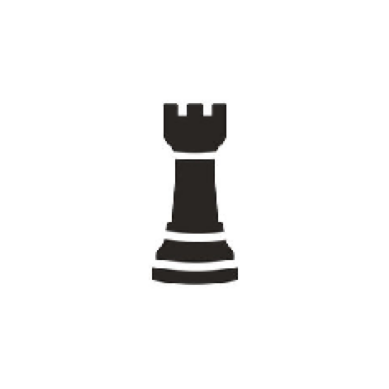

1/1 [==============================] - 1s 874ms/step
Result     :  [[1.4456770e-03 1.2489080e-02 2.2112802e-04 3.7543951e-03 3.7291911e-03
  9.7836053e-01]]
Max Class  :  5
Class Name :  Rook



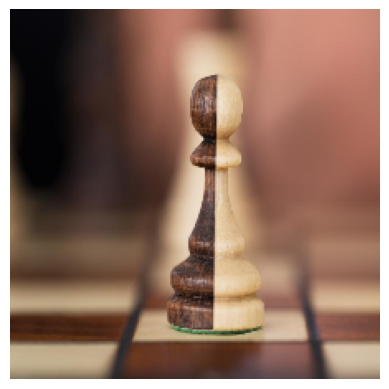

1/1 [==============================] - 0s 263ms/step
Result     :  [[0.27310178 0.09414885 0.05852048 0.3492958  0.1287447  0.09618837]]
Max Class  :  3
Class Name :  Pawn



In [6]:
img_paths = ['img-test-1.jpg','img-test-2.jpg']

for filename in img_paths:
  img = image.load_img(filename, target_size=(224, 224, 3))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  img_batch = img_batch / 255.0
  class_names = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]
  
  prediction_inf = model.predict(img_batch)
  result_max_proba = prediction_inf.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction_inf)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')